<a href="https://colab.research.google.com/github/AtharvaKawadkar/Final_Email_Phishing_Detection_using_Ml/blob/main/Final_Email_Phishing_Detection_using_Ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#Import the Dataset
df = pd.read_csv("Phishing_Email_1.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
df.shape

(18650, 3)

# Data Cleaning

In [ ]:
# drop last 3 cols
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
# Check NAN values
df.isna().sum()

Email Text    16
Email Type     0
dtype: int64

In [ ]:
#Drop tha Na values
df = df.dropna()
print(df.isna().sum())

Email Text    0
Email Type    0
dtype: int64


In [ ]:
df.replace(('Safe Email', 'Phishing Email'), (0, 1), inplace=True)
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,the other side of * galicismos * * galicismo *...,0
2,re : equistar deal tickets are you still avail...,0
3,\nHello I am your hot lil horny toy.\n I am...,1
4,software at incredibly low prices ( 86 % lower...,1


In [ ]:
# check for duplicate values
df.duplicated().sum()

1096

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
#dataset shape
df.shape

(17538, 2)

# EDA

In [ ]:
# Count the occurrences of each E-mail type.
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)

Email Type
0    10980
1     6558
Name: count, dtype: int64


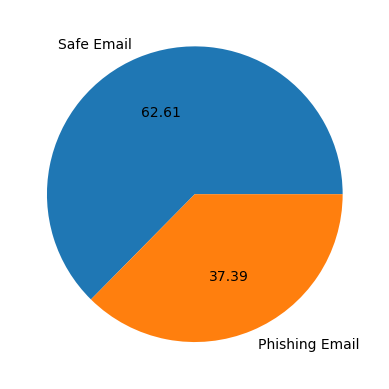

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Email Type'].value_counts(), labels=['Safe Email','Phishing Email'],autopct="%0.2f")
plt.show()

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [ ]:
df['num_characters'] = df['Email Text'].apply(len)
df.head()

,Email Text,Email Type,num_characters
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0,1030
1,the other side of * galicismos * * galicismo *...,0,479
2,re : equistar deal tickets are you still avail...,0,1245
3,\nHello I am your hot lil horny toy.\n I am...,1,688
4,software at incredibly low prices ( 86 % lower...,1,441


In [ ]:
# num of words
df['num_words'] = df['Email Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Email Text,Email Type,num_characters,num_words
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0,1030,230
1,the other side of * galicismos * * galicismo *...,0,479,91
2,re : equistar deal tickets are you still avail...,0,1245,305
3,\nHello I am your hot lil horny toy.\n I am...,1,688,116
4,software at incredibly low prices ( 86 % lower...,1,441,91


In [ ]:
df['num_sentences'] = df['Email Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Email Text,Email Type,num_characters,num_words,num_sentences
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0,1030,230,10
1,the other side of * galicismos * * galicismo *...,0,479,91,7
2,re : equistar deal tickets are you still avail...,0,1245,305,8
3,\nHello I am your hot lil horny toy.\n I am...,1,688,116,8
4,software at incredibly low prices ( 86 % lower...,1,441,91,13


In [ ]:
# phishing
df[df['Email Type'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,6558.000000,6558.000000,6558.000000
mean,1697.599421,339.266240,21.010064
std,3468.074987,635.241318,54.587992
min,1.000000,0.000000,0.000000
25%,399.000000,81.000000,6.000000
50%,763.500000,157.000000,10.000000
75%,1670.000000,330.000000,20.000000
max,129635.000000,13291.000000,3093.000000


In [ ]:
#safe email

# Set display options to show large numbers in standard notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the descriptive statistics again
df[df['Email Type'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,10980.00,10980.00,10980.00
mean,3557.18,734.46,40.90
std,162638.05,34587.56,2131.01
min,5.00,1.00,1.00
25%,470.00,96.00,5.00
50%,1021.00,211.00,9.00
75%,2055.00,422.00,19.00
max,17036692.00,3623496.00,223247.00


# Data Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from nltk.corpus import stopwords
import string

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
df['transformed_text'] = df['Email Text'].apply(transform_text)

In [ ]:
df.head()

,Email Text,Email Type,num_characters,num_words,num_sentences,transformed_text
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0,1030,230,10,6 1100 disc uniformitarian 1086 sex lang dick ...
1,the other side of * galicismos * * galicismo *...,0,479,91,7,side galicismo galicismo spanish term name imp...
2,re : equistar deal tickets are you still avail...,0,1245,305,8,equistar deal ticket still avail assist robert...
3,\nHello I am your hot lil horny toy.\n I am...,1,688,116,8,hello hot lil horni toy one dream open mind pe...
4,software at incredibly low prices ( 86 % lower...,1,441,91,13,softwar incred low price 86 lower draperi seve...


# Model Building

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=6000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(17538, 6000)

In [ ]:
y = df['Email Type'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import classification_report

LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression()

In [ ]:
#train the classifier
logistic_clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#make predictions
logistic_predict = logistic_clf.predict(X_test)

In [ ]:
log_accuracy = accuracy_score(logistic_predict, y_test)

In [ ]:
log_precision = precision_score(logistic_predict, y_test)

In [ ]:
report = classification_report(y_test, logistic_predict, labels=[0,1], output_dict=True)

# Convert the classification report to a DataFrame for better formatting
df1 = pd.DataFrame(report).transpose()
df1

,precision,recall,f1-score,support
0,0.98,0.99,0.98,2190.00
1,0.98,0.96,0.97,1318.00
accuracy,0.98,0.98,0.98,0.98
macro avg,0.98,0.98,0.98,3508.00
weighted avg,0.98,0.98,0.98,3508.00


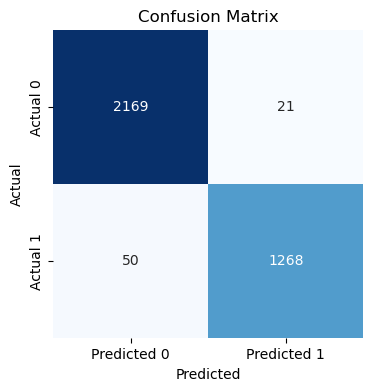

In [ ]:
conf_matrix = confusion_matrix(y_test, logistic_predict)

# Create a more visually appealing confusion matrix plot
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Your code for obtaining the confusion matrix
conf_matrix = confusion_matrix(y_test, logistic_predict)

# Extract TP, TN, FP, FN from the confusion matrix
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

# Calculate precision, recall, accuracy, and F1-Score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1 = f1_score(y_test, logistic_predict)

# Create a transposed table to display the values
table_data = {
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1],
    'Accuracy': [accuracy],
    'True Positive (TP)': [tp],
    'True Negative (TN)': [tn],
    'False Positive (FP)': [fp],
    'False Negative (FN)': [fn]
}

# Display the transposed table
import pandas as pd
pd.DataFrame(table_data)


,Precision,Recall,F1-Score,Accuracy,True Positive (TP),True Negative (TN),False Positive (FP),False Negative (FN)
0,0.98,0.96,0.97,0.98,1268,2169,21,50


RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=2)

In [ ]:
#train the classifier
random_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=2)

In [ ]:
#make predictions
random_predict = random_clf.predict(X_test)

In [ ]:
random_accuracy = accuracy_score(random_predict, y_test)

In [ ]:
random_precision = precision_score(random_predict, y_test)

In [ ]:
report = classification_report(y_test, random_predict, labels=[0,1], output_dict=True)

# Convert the classification report to a DataFrame for better formatting
df2 = pd.DataFrame(report).transpose()
df2

,precision,recall,f1-score,support
0,0.82,1.00,0.90,2190.00
1,0.99,0.63,0.77,1318.00
accuracy,0.86,0.86,0.86,0.86
macro avg,0.91,0.82,0.84,3508.00
weighted avg,0.88,0.86,0.85,3508.00


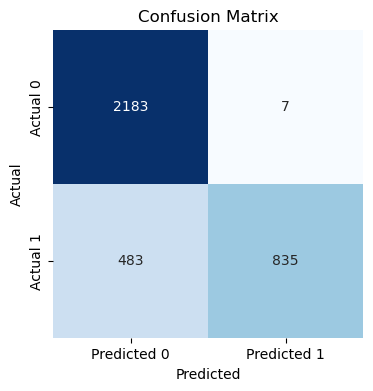

In [ ]:
conf_matrix = confusion_matrix(y_test, random_predict)

# Create a more visually appealing confusion matrix plot
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Your code for obtaining the confusion matrix
conf_matrix = confusion_matrix(y_test, random_predict)

# Extract TP, TN, FP, FN from the confusion matrix
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

# Calculate precision, recall, accuracy, and F1-Score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1 = f1_score(y_test, random_predict)

# Create a transposed table to display the values
table_data = {
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1],
    'Accuracy': [accuracy],
    'True Positive (TP)': [tp],
    'True Negative (TN)': [tn],
    'False Positive (FP)': [fp],
    'False Negative (FN)': [fn]
}

# Display the transposed table
import pandas as pd
pd.DataFrame(table_data)


,Precision,Recall,F1-Score,Accuracy,True Positive (TP),True Negative (TN),False Positive (FP),False Negative (FN)
0,0.99,0.63,0.77,0.86,835,2183,7,483


ExtraTrees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
extra_clf = ExtraTreesClassifier(n_estimators=300, max_depth=100, random_state=2)

In [ ]:
#train the classifier
extra_clf.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=100, n_estimators=300, random_state=2)

In [ ]:
#make predictions
extra_predict = extra_clf.predict(X_test)

In [ ]:
extra_accuracy = accuracy_score(extra_predict, y_test)

In [ ]:
extra_precision = precision_score(y_test,extra_predict)
extra_precision

0.9910858995137763

In [ ]:
report = classification_report(y_test, extra_predict, labels=[0,1], output_dict=True)

# Convert the classification report to a DataFrame for better formatting
df3 = pd.DataFrame(report).transpose()
df3

,precision,recall,f1-score,support
0,0.96,0.99,0.98,2190.00
1,0.99,0.93,0.96,1318.00
accuracy,0.97,0.97,0.97,0.97
macro avg,0.97,0.96,0.97,3508.00
weighted avg,0.97,0.97,0.97,3508.00


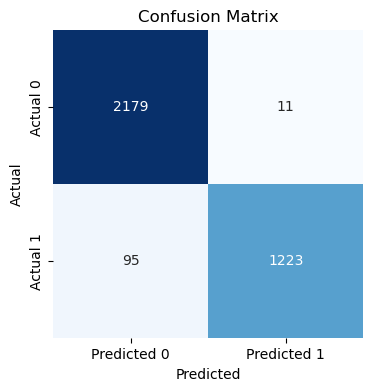

In [ ]:
conf_matrix = confusion_matrix(y_test, extra_predict)

# Create a more visually appealing confusion matrix plot
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Your code for obtaining the confusion matrix
conf_matrix = confusion_matrix(y_test, extra_predict)

# Extract TP, TN, FP, FN from the confusion matrix
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

# Calculate precision, recall, accuracy, and F1-Score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1 = f1_score(y_test, extra_predict)

# Create a transposed table to display the values
table_data = {
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1],
    'Accuracy': [accuracy],
    'True Positive (TP)': [tp],
    'True Negative (TN)': [tn],
    'False Positive (FP)': [fp],
    'False Negative (FN)': [fn]
}

# Display the transposed table
import pandas as pd
pd.DataFrame(table_data)


,Precision,Recall,F1-Score,Accuracy,True Positive (TP),True Negative (TN),False Positive (FP),False Negative (FN)
0,0.99,0.93,0.96,0.97,1223,2179,11,95


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_clf = GaussianNB()

In [ ]:
#train the classifier
naive_clf.fit(X_train,y_train)

GaussianNB()

In [ ]:
#make predictions
naive_predict = naive_clf.predict(X_test)

In [ ]:
naive_accuracy = accuracy_score(naive_predict, y_test)

In [ ]:
naive_precision = precision_score(naive_predict, y_test)

In [ ]:
report = classification_report(y_test, naive_predict, labels=[0,1], output_dict=True)

# Convert the classification report to a DataFrame for better formatting
df4 = pd.DataFrame(report).transpose()
df4

,precision,recall,f1-score,support
0,0.96,0.85,0.90,2190.00
1,0.79,0.93,0.86,1318.00
accuracy,0.88,0.88,0.88,0.88
macro avg,0.87,0.89,0.88,3508.00
weighted avg,0.89,0.88,0.88,3508.00


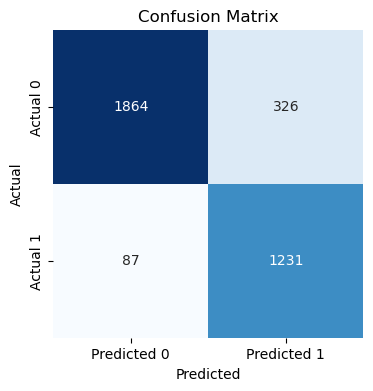

In [ ]:
conf_matrix = confusion_matrix(y_test, naive_predict)

# Create a more visually appealing confusion matrix plot
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Your code for obtaining the confusion matrix
conf_matrix = confusion_matrix(y_test, naive_predict)

# Extract TP, TN, FP, FN from the confusion matrix
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

# Calculate precision, recall, accuracy, and F1-Score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1 = f1_score(y_test, naive_predict)

# Create a transposed table to display the values
table_data = {
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1],
    'Accuracy': [accuracy],
    'True Positive (TP)': [tp],
    'True Negative (TN)': [tn],
    'False Positive (FP)': [fp],
    'False Negative (FN)': [fn]
}

# Display the transposed table
import pandas as pd
pd.DataFrame(table_data)


,Precision,Recall,F1-Score,Accuracy,True Positive (TP),True Negative (TN),False Positive (FP),False Negative (FN)
0,0.79,0.93,0.86,0.88,1231,1864,326,87


In [ ]:
# accuracy of all the algorithm
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'Precision':log_precision},
    "RandomForest Classifier":{'Accuracy':random_accuracy, 'Precision':random_precision},
    "ExtraTrees Classifier":{'Accuracy':extra_accuracy, 'Precision':extra_precision},
    "Naive Bayes":{'Accuracy':naive_accuracy, 'Precision':naive_precision}
}).T

In [ ]:
comparison

,Accuracy,Precision
Logistic regression,0.98,0.96
RandomForest Classifier,0.86,0.63
ExtraTrees Classifier,0.97,0.99
Naive Bayes,0.88,0.93


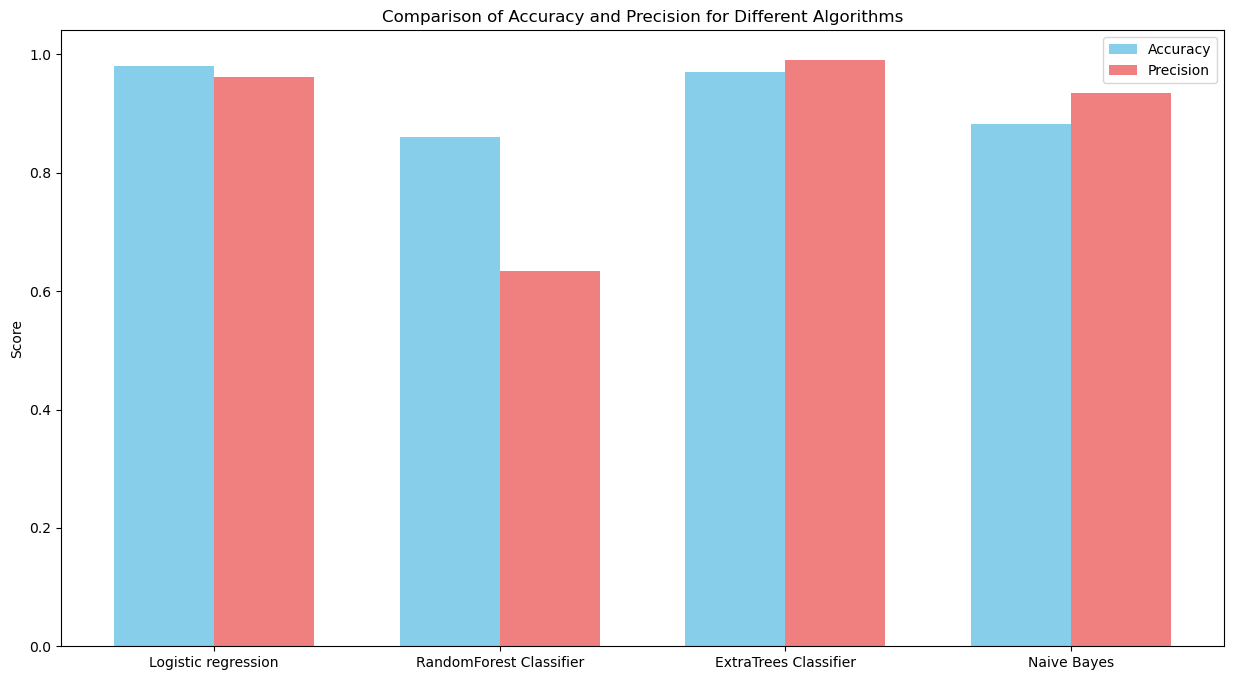

In [ ]:
# Visualizing Accuracy and Precision with a combined bar graph
fig, ax = plt.subplots(figsize=(15, 8))

# Bar graph for Accuracy
bar_width = 0.35
bar_positions = np.arange(len(comparison.index))
ax.bar(bar_positions, comparison['Accuracy'], width=bar_width, label='Accuracy', color='skyblue')

# Bar graph for Precision
ax.bar(bar_positions + bar_width, comparison['Precision'], width=bar_width, label='Precision', color='lightcoral')

ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(comparison.index)
ax.legend()
ax.set_title('Comparison of Accuracy and Precision for Different Algorithms')
ax.set_ylabel('Score')

plt.show()